In [110]:
import pandas as pd
import numpy as np
from IPython.display import Image

from warnings import filterwarnings
filterwarnings('ignore')

In [111]:
df= pd.read_csv("../data/airline_passengers.csv",index_col="Month",parse_dates=True)
df.index.freq="MS"
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [112]:
'''
It Goes up 1960, so it means past the year 1960, basically entering 1961.
That is the future.

And according to this data set that we don't have data for.
So later on, towards the very end, we're going to forecast into the early 60s.

So we'll try to forecast maybe a one to three years ahead and see what we predict as far as the thousands
of passengers flying for every month, three years into the future.
'''
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


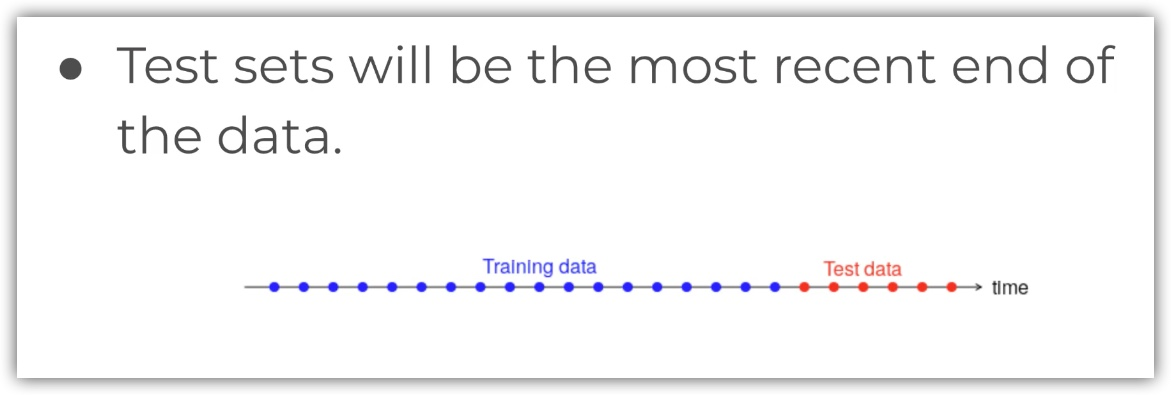

In [149]:


'''
Test sets in Time series will be the most recent end of the data.

So if we were to lay out our time series flat with time going forward or to the right, we'd have the
first portion, the larger portion be the training data, and then we would have the most recent and
be our test data.

So we will fit our model on the training data and then forecast off the training data to the same length
of time that our test data is and then compare our forecasted results to the real test data that we
already know the correct answers for.

But a really common question is how do we decide how large that portion of the data should be?
The test data?
And there's no 100 percent correct answer here, but typically the size of the test is about 20 percent
of the total sample, and this really depends on how long the sample is and how far ahead you want to
forecast.

What you should really keep in mind is instead of this 80, 20 percent split, is that the test size
should ideally be at least as large as the maximum forecast horizon required.

So what that means is if you intend to predict one year into the future, then your test data should
be at least one year in length.

Keep in mind, however, the longer the forecast horizon, the more likely your prediction will become
less accurate just because you're starting to predict more and more and there's more noise added in
and now you're predicting off a prediction.
'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/TimeSeries/Jose Portilla/Python for Time Series Data Analysis/Image/2021-10-26_10-23-43.jpg')

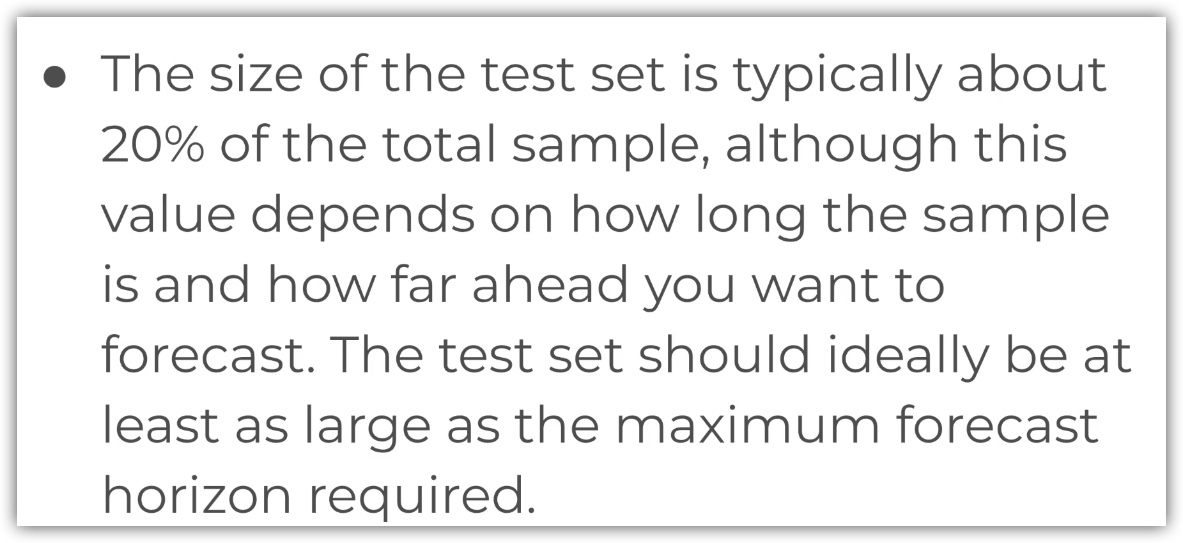

In [114]:
Image("/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/TimeSeries/Jose Portilla/Python for Time Series Data Analysis/Image/2021-10-26_15-39-36.jpg")

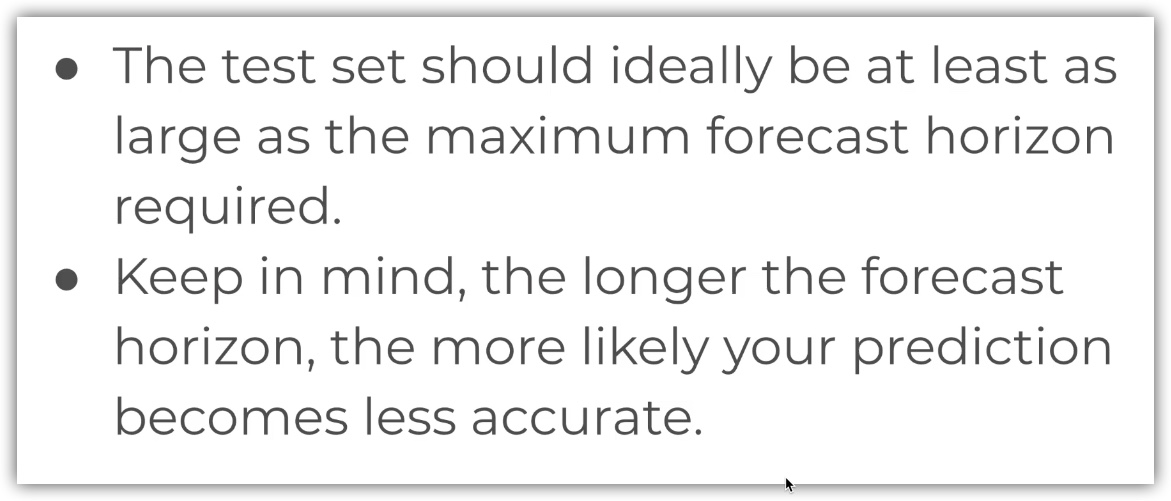

In [115]:
Image("/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/TimeSeries/Jose Portilla/Python for Time Series Data Analysis/Image/2021-10-26_15-42-04.jpg")

In [116]:
'''
Let's go ahead and perform the train to split and fortunately, the train to split is essentially just
an indexing command and you can either do it by the timestamp or by the index for the integer location

We simply say grab our entire data frame, which is just here, essentially a single column, and then
say df.iLoc And then go : all the way from the beginning, up to some index position 109
'''
df.info()
train_data =df.iloc[:109]
test_data=df.iloc[108:]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [117]:
'''
Now it's time to fit the model to the training data.

It will say exponential smoothing, grab our training data and the column from the training data is
just want a single series is thousands of passengers.

because we're going to do exponential smoothing whether we want a
multiplicative trend or a seasonal trend.

I'll go ahead and use a multiplicative trend and a multiplicative seasonal component.
So we're going to have a couple of different parameters here.trend='mul', seasonal='mul'

because 12 entries per seasonal period, 12 months per year so seasonal_periods=12
'''
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model=ExponentialSmoothing(train_data["Thousands of Passengers"],
                                  trend='mul',
                                  seasonal='mul',
                                  seasonal_periods=12).fit()

In [118]:
'''
And now it's time to forecast on the test data and then compare it to the test data.

off this fitted model object.You should be able to call that forecast (itted_model.forecast(26)) and then it's up to you
to provide how many periods you want to forecast into the future.

Now, every row is essentially one month of information.
So that means if I wanted to forecast one year into the future, I would do 12 periods or if I wanted
to do three years into the future, I would do 36 periods because 12 * 3=36.
'''

test_predictions=fitted_model.forecast(36)

In [119]:
'''
So if we take a look at what test predictions is, we can see here it's essentially a series where we're
predicting a certain value for a date.
'''
test_predictions

1958-02-01    339.142997
1958-03-01    399.281707
1958-04-01    394.233601
1958-05-01    402.545257
1958-06-01    473.128827
1958-07-01    521.795478
1958-08-01    514.513898
1958-09-01    446.217095
1958-10-01    385.431161
1958-11-01    339.645268
1958-12-01    381.455794
1959-01-01    401.210352
1959-02-01    387.159316
1959-03-01    455.812544
1959-04-01    450.049721
1959-05-01    459.538153
1959-06-01    540.115039
1959-07-01    595.671979
1959-08-01    587.359464
1959-09-01    509.393108
1959-10-01    440.001019
1959-11-01    387.732699
1959-12-01    435.462816
1960-01-01    458.014250
1960-02-01    441.973849
1960-03-01    520.347094
1960-04-01    513.768362
1960-05-01    524.600178
1960-06-01    616.585248
1960-07-01    680.008014
1960-08-01    670.518602
1960-09-01    581.513665
1960-10-01    502.296952
1960-11-01    442.628413
1960-12-01    497.116223
1961-01-01    522.860519
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Month'>

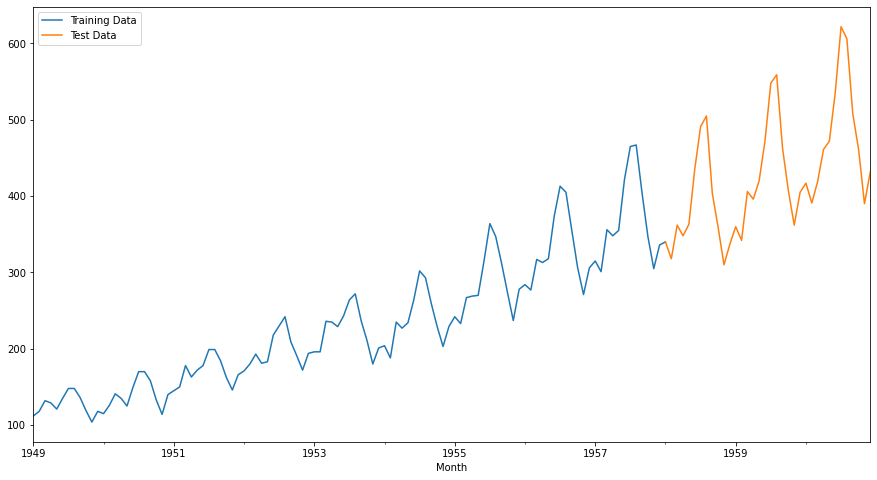

In [120]:
'''
So we're going to do now is plot this against our real data.
So the first plot, the training in the test data, then we'll plot our predictions
'''

train_data["Thousands of Passengers"].plot(legend=True,label="Training Data", figsize=(15,8))
test_data["Thousands of Passengers"].plot(legend=True,label="Test Data", figsize=(15,8))

<AxesSubplot:xlabel='Month'>

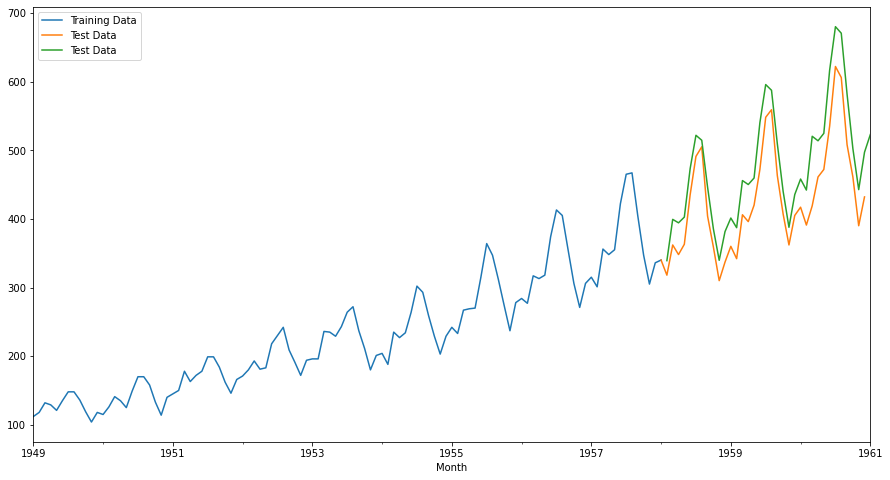

In [121]:
'''
Now, what I want to do is I want to see how well did my predictions actually perform

We have our original training data and then we can see the test in orange and the prediction in green.

Our prediction seems to be more or less on top of our test data.
'''
train_data["Thousands of Passengers"].plot(legend=True,label="Training Data", figsize=(15,8))
test_data["Thousands of Passengers"].plot(legend=True,label="Test Data", figsize=(15,8))
test_predictions.plot(legend=True,label="Test Data", figsize=(15,8))

<AxesSubplot:xlabel='Month'>

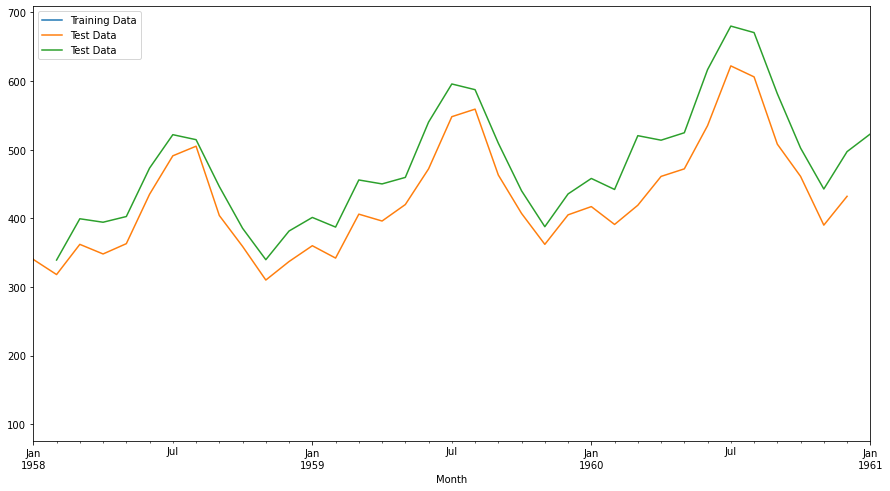

In [122]:
'''
And in fact, we can zoom in on this to see what's going on in more detail.

So just off one of these the last one we can say xlim=['1958-01-01','1961-01-01'] and let's go ahead and set the X limits to what
we the range we were predicting for, which was essentially the beginning of 1958,to 1961

And you can see that we're definitely picking up a lot of the information.

We're able to pick up that seasonality.
But in some cases, our prediction is maybe lagging a little bit or it's under predicting the results
and sometimes it's overprotecting kind of on the downturn's.

We can see visually here that we're performing pretty well, but how do we actually quantify this?
So we need to learn about a couple of the evaluation metrics so we can quantify just how off our prediction
is from our test data.

'''

train_data["Thousands of Passengers"].plot(legend=True,label="Training Data", figsize=(15,8))
test_data["Thousands of Passengers"].plot(legend=True,label="Test Data", figsize=(15,8))
test_predictions.plot(legend=True,label="Test Data", figsize=(15,8),xlim=['1958-01-01','1961-01-01'])

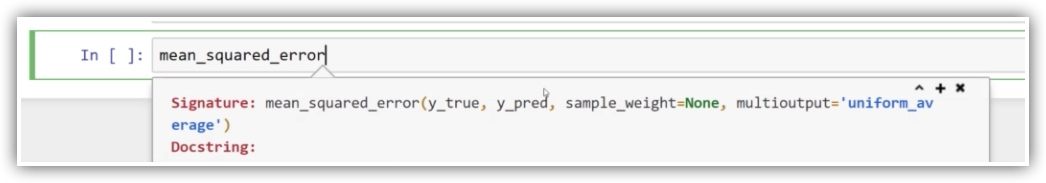

In [123]:
'''
But what we really want is a quantitative way of displaying this sort of thing with a number.
'''

from sklearn.metrics import mean_squared_error,mean_absolute_error

'''
So we're going to do is simply use these error functions.
And if you take a look at them by shift out, you'll notice that they basically take in white true and
white predicted,
'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/TimeSeries/Jose Portilla/Python for Time Series Data Analysis/Image/2021-10-26_17-24-21.jpg')

In [124]:
'''
So we're just going to pass in our test data.
And our test predictions.
And we can do this for both of these, so let's first do mean absolute error
'''

mean_absolute_error(test_data,test_predictions)
#len(test_data),len(test_predictions)

63.031219605902756

In [125]:
'''
And in order to get an idea of what that value really signifies, what we should be doing is comparing
it to the average values for our test data.
So to get the mean use test_dat.describe()

so our mean 442.34 and standard deviation 81.1 but our MAE is 45
So that should hopefully give you an idea of usually how far off you were throughout this prediction
of our prediction versus the test set.

'''
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [126]:
mean_squared_error(test_data,test_predictions)

5614.282339868857

In [127]:
'''
what is good about RMSE is that can easily compare to the standard deviation of the overall data.

So you notice that our root mean squared error is actually less than the standard deviation of the true
data.So it means we're actually performing quite well
'''
#RMSE
np.sqrt(mean_squared_error(test_data,test_predictions))

74.92851486496217

In [130]:
'''
However, let's say we were satisfied with this model and now we want to predict into the future for
data that we actually don't have yet.

So now we're going to forecast into the future and the way we do this is we want to retrain our model
on the entirety of the data set.

So we're going to grab, again, the exponential smoothing model and off the entire data frame.
That's our original data.
So we're going to retrain everything and we'll say trend is multiplicative.
So we have trends multiplicative, seasonal multiplicative and then seasonal periods.
Is equal to 12 and then we're going to fit this.
'''
final_model=ExponentialSmoothing(df["Thousands of Passengers"],
                                  trend='mul',
                                  seasonal='mul',
                                  seasonal_periods=12).fit()

In [131]:
'''
But now it's time to forecast using this final model.

So say our forecast predictions is the final model and we're going to call forecast and let's go ahead
and forecast 36 in advance or 3 years ahead.
'''

forecast_predictions=final_model.forecast(36)

<AxesSubplot:xlabel='Month'>

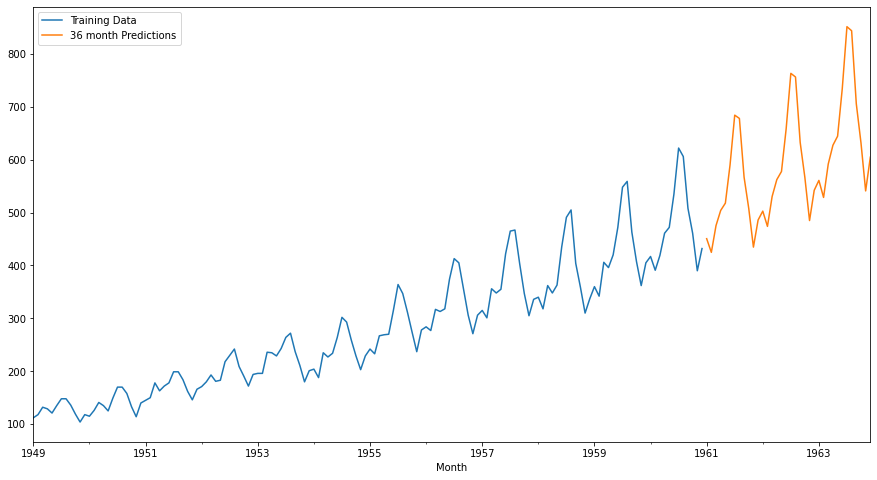

In [133]:
'''
So what we're going to do now is plot out our original data against the predictions.

We can see that the trend is growing according to our prediction, and we still have that seasonality
'''

df["Thousands of Passengers"].plot(legend=True,label="Training Data", figsize=(15,8))
forecast_predictions.plot(legend=True,label="36 month Predictions", figsize=(15,8))

In [135]:
'''
So the two ideas I want to introduce right now are stationary and defensing.

So a time series data set is said to be stationary if it does not exhibit trends or seasonality, that
is fluctuations in the data are entirely due to outside forces and noise.

Again, stationary data does not exhibit trends or seasonality.

So if we were to take the A column off the data frame and plot it out.
You'll notice that there doesn't seem to be any sort of seasonality or trend component, we can't clearly
see that this is growing or declining on average, and we also can't clearly see that it has a any sort
of seasonality or repeats over these years.
'''
df2=pd.read_csv('../data/samples.csv',index_col=0,parse_dates=True)
df2

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62
...,...,...,...,...
1959-08-01,49,73,9338,58
1959-09-01,41,77,9502,38
1959-10-01,64,70,9667,42
1959-11-01,37,87,9833,62


<AxesSubplot:>

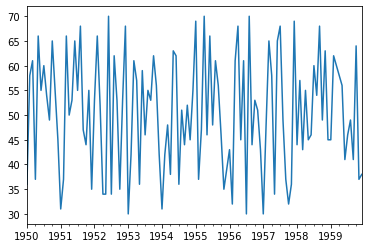

In [136]:
df2["a"].plot()

<AxesSubplot:>

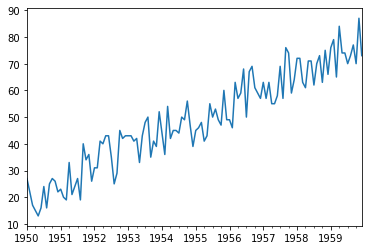

In [137]:
'''
So if we plot this out, you'll notice that even though this doesn't look like it has any seasonality,
there is a clear trend that overall, on average, these values tend to be increasing.
So this is non stationary data.

So, again, if we do not have any seasonality or any growth trends or declining trends, that means
we have stationary data.

The first one non stationary data shows either a trend or seasonality or both.
'''
df2["b"].plot()

In [145]:
'''
Now, what's interesting is that non stationary data such as this data set right here that really has
a trend, it can be made to look stationary through what's known as defensing.

And a simple difference in method.
All it does is it calculates the difference between consecutive points.

how you would calculate a first order difference yourself?
So to do this, you would simply take a look at your dataset that was non stationary.

to check it out and make it a first differenced version, you would simply take that data
and subtract from it The data set and Shifted forward by one.

All you're saying is 22-27 =-5 And that's going to be your first date or -, then 17-22=-5 And again, that's -5,
again 15-17=-2,and then that's -2 and so on.

And this is the first order difference.
'''

from statsmodels.tsa.statespace.tools import  diff

df2["b"]

1950-01-01    27
1950-02-01    22
1950-03-01    17
1950-04-01    15
1950-05-01    13
              ..
1959-08-01    73
1959-09-01    77
1959-10-01    70
1959-11-01    87
1959-12-01    73
Name: b, Length: 120, dtype: int64

In [144]:
df2["b"].shift(1)

1950-01-01     NaN
1950-02-01    27.0
1950-03-01    22.0
1950-04-01    17.0
1950-05-01    15.0
              ... 
1959-08-01    70.0
1959-09-01    73.0
1959-10-01    77.0
1959-11-01    70.0
1959-12-01    87.0
Name: b, Length: 120, dtype: float64

In [141]:
df2["b"]-df2["b"].shift(1)

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 120, dtype: float64

In [146]:
'''
Now, luckily, instead of having to perform this calculation yourself, well, you can do is simply
call the difference in function from stats models.

Passing the series, you want a difference and then passing the order, you want a difference, too,
which is k_diff=1,That's essentially what value you're passing in for a shift here.

The reason we don't see NaN here is because we don't show it
'''

diff(df2["b"],k_diff=1)

1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
1950-06-01     3.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 119, dtype: float64

<AxesSubplot:>

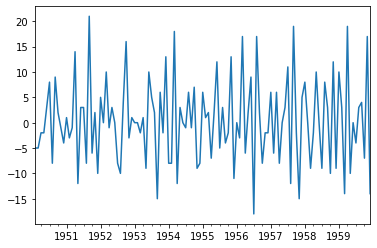

In [147]:
'''

We would see now that after taking the first difference, this data appears to be stationary, it no
longer has this general trend component and we also no longer see any seasonality.
'''
diff(df2["b"],k_diff=1).plot()